## Import Libraries

In [79]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## Data Preprocessing

In [24]:
col_names=['state',
 'county',
 'community',
 'communityname',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PctNotSpeakEnglWell',
 'PctLargHouseFam',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerOwnOccHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'MedNumBR',
 'HousVacant',
 'PctHousOccup',
 'PctHousOwnOcc',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'PctHousNoPhone',
 'PctWOFullPlumb',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'OwnOccHiQuart',
 'RentLowQ',
 'RentMedian',
 'RentHighQ',
 'MedRent',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'NumInShelters',
 'NumStreet',
 'PctForeignBorn',
 'PctBornSameState',
 'PctSameHouse85',
 'PctSameCity85',
 'PctSameState85',
 'LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'LandArea',
 'PopDens',
 'PctUsePubTrans',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'LemasPctOfficDrugUn',
 'PolicBudgPerPop',
 'ViolentCrimesPerPop']

df=pd.read_csv("Communities.csv",names=col_names)
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [25]:
unknown_cols=[]
c=0
for i in col_names:
  if (np.count_nonzero(df[i].values=='?'))>df[i].values.size/2:
    unknown_cols.append(i)
    col_names.pop(c)
  c+=1
print(len(col_names))
print(len(unknown_cols))

115
13


/var/folders/lx/91frsks17nd10bjlxdl7mvc00000gn/T/ipykernel_70210/3869477433.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (np.count_nonzero(df[i].values=='?'))>df[i].values.size/2:


In [26]:
df = df.drop(columns=unknown_cols)
df.head()

,state,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PctPolicHisp,PctPolicMinor,NumKindsDrugsSeiz,LandArea,PopDens,PctUsePubTrans,PolicOperBudg,LemasGangUnitDeploy,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.07,0.07,0.57,0.12,0.26,0.20,0.04,0.5,0.32,0.20
1,53,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,...,?,?,?,0.02,0.12,0.45,?,?,0.00,0.67
2,24,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,...,?,?,?,0.01,0.21,0.02,?,?,0.00,0.43
3,34,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,...,?,?,?,0.02,0.39,0.28,?,?,0.00,0.12
4,42,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,...,?,?,?,0.04,0.09,0.02,?,?,0.00,0.03


In [27]:
unknown_cols=[]
for i in col_names:
  if (np.count_nonzero(df[i].values=='?'))>0:
    unknown_cols.append(i)


def fill_empty(col):
  avg=np.mean((df[df[col].values!='?'][col].values).astype(float))
  df[col]=df[col].replace("?",avg)
  df[col]=df[col].values.astype(float)

for i in unknown_cols:
  fill_empty(i)

df.head()

/var/folders/lx/91frsks17nd10bjlxdl7mvc00000gn/T/ipykernel_70210/1763613025.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (np.count_nonzero(df[i].values=='?'))>0:


,state,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PctPolicHisp,PctPolicMinor,NumKindsDrugsSeiz,LandArea,PopDens,PctUsePubTrans,PolicOperBudg,LemasGangUnitDeploy,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.070000,0.070000,0.57000,0.12,0.26,0.20,0.040000,0.500000,0.32,0.20
1,53,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.134859,0.259185,0.55605,0.02,0.12,0.45,0.076708,0.440439,0.00,0.67
2,24,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.134859,0.259185,0.55605,0.01,0.21,0.02,0.076708,0.440439,0.00,0.43
3,34,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.134859,0.259185,0.55605,0.02,0.39,0.28,0.076708,0.440439,0.00,0.12
4,42,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.134859,0.259185,0.55605,0.04,0.09,0.02,0.076708,0.440439,0.00,0.03


In [28]:
communityname_mapping = {label: idx for idx, label in enumerate(df['communityname'].unique())}

# Apply the mapping to create a new encoded column
df['communityname_encoded'] = df['communityname'].map(communityname_mapping)

# Now df['communityname_encoded'] contains the numeric encoding
print(df[['communityname', 'communityname_encoded']].head())

# Drop the original 'communityname' column
df = df.drop(columns=["communityname"])

# Display the updated DataFrame
df.head()


         communityname  communityname_encoded
0         Lakewoodcity                      0
1          Tukwilacity                      1
2         Aberdeentown                      2
3  Willingborotownship                      3
4    Bethlehemtownship                      4


,state,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctPolicMinor,NumKindsDrugsSeiz,LandArea,PopDens,PctUsePubTrans,PolicOperBudg,LemasGangUnitDeploy,LemasPctOfficDrugUn,ViolentCrimesPerPop,communityname_encoded
0,8,46188.336597,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.070000,0.57000,0.12,0.26,0.20,0.040000,0.500000,0.32,0.20,0
1,53,46188.336597,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.259185,0.55605,0.02,0.12,0.45,0.076708,0.440439,0.00,0.67,1
2,24,46188.336597,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.259185,0.55605,0.01,0.21,0.02,0.076708,0.440439,0.00,0.43,2
3,34,81440.000000,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.259185,0.55605,0.02,0.39,0.28,0.076708,0.440439,0.00,0.12,3
4,42,6096.000000,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.259185,0.55605,0.04,0.09,0.02,0.076708,0.440439,0.00,0.03,4


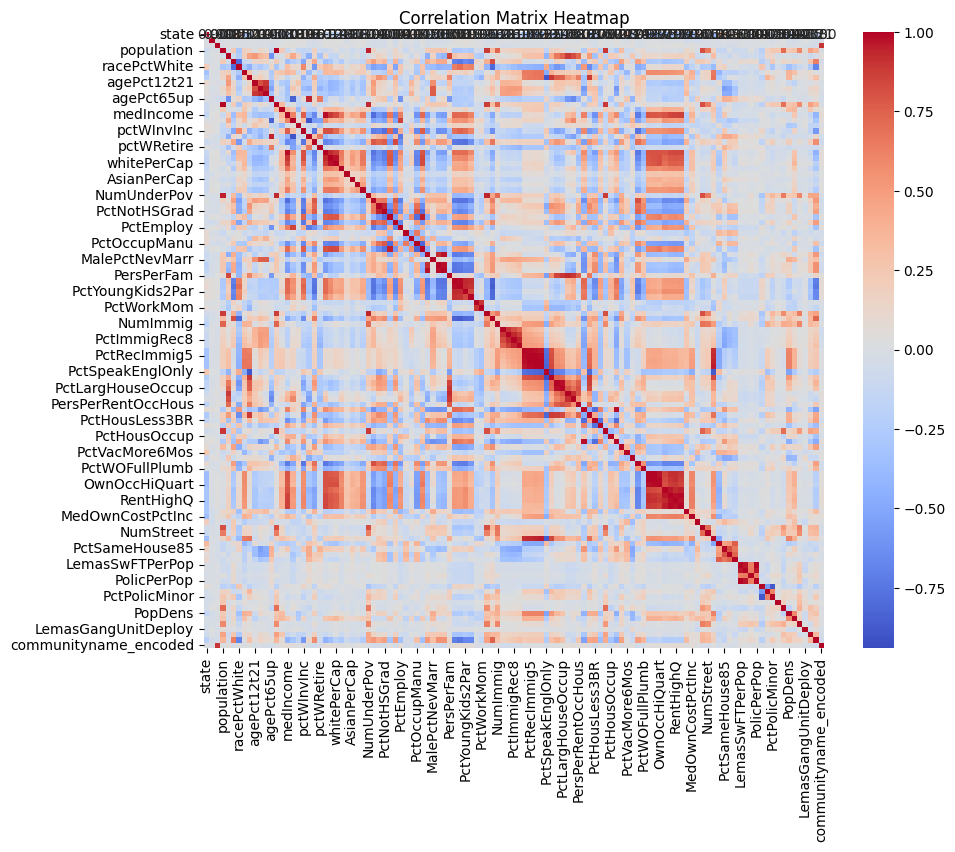

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
print(df.corr()['ViolentCrimesPerPop'])
df.info()

state                   -0.211398
community               -0.043038
fold                    -0.032577
population               0.367157
householdsize           -0.034923
                           ...   
PolicOperBudg            0.160234
LemasGangUnitDeploy      0.055038
LemasPctOfficDrugUn      0.348627
ViolentCrimesPerPop      1.000000
communityname_encoded   -0.053552
Name: ViolentCrimesPerPop, Length: 115, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 115 entries, state to communityname_encoded
dtypes: float64(112), int64(3)
memory usage: 1.7 MB


In [31]:
c=0
col_names=list(df.columns)
drop_col=[]
for i in df.corr()['ViolentCrimesPerPop']:
    if (abs(i)<0.25):
        drop_col.append(col_names[c])
    c+=1

drop_col

['state',
 'community',
 'fold',
 'householdsize',
 'racePctAsian',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'pctUrban',
 'pctWFarmSelf',
 'pctWSocSec',
 'pctWRetire',
 'whitePerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctEmplManu',
 'PctEmplProfServ',
 'PersPerFam',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctSpeakEnglOnly',
 'PersPerOccupHous',
 'PersPerOwnOccHous',
 'PersPerRentOccHous',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'OwnOccHiQuart',
 'RentMedian',
 'RentHighQ',
 'MedRent',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'PctForeignBorn',
 'PctBornSameState',
 'PctSameHouse85',
 'PctSameCity85',
 'PctSameState85',
 'LemasSwFTPerPop',
 'LemasSwFTFieldPerPop',
 'LemasTotReqPerPop',
 'PolicPerPop',
 'PctPolicWhite',
 'PctPolicHisp',
 'PctPolicMinor',
 'NumKindsDrugsSeiz',
 'LandArea',
 'PctUsePubTrans

In [32]:
df=df.drop(columns=drop_col)
df.head()

,population,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,medFamInc,...,PctVacantBoarded,PctHousNoPhone,PctWOFullPlumb,RentLowQ,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.02,0.90,0.17,0.20,0.37,0.72,0.60,0.15,0.39,...,0.05,0.14,0.06,0.36,0.38,0.04,0.0,0.26,0.32,0.20
1,0.00,0.12,0.74,0.07,0.02,0.31,0.72,0.45,0.29,0.29,...,0.02,0.16,0.00,0.42,0.29,0.00,0.0,0.12,0.00,0.67
2,0.00,0.49,0.56,0.04,0.00,0.30,0.58,0.39,0.40,0.28,...,0.29,0.47,0.45,0.27,0.48,0.00,0.0,0.21,0.00,0.43
3,0.04,1.00,0.08,0.10,0.06,0.58,0.89,0.43,0.20,0.51,...,0.60,0.11,0.11,0.75,0.63,0.00,0.0,0.39,0.00,0.12
4,0.01,0.02,0.95,0.05,0.02,0.50,0.72,0.68,0.11,0.46,...,0.04,0.05,0.14,0.40,0.22,0.00,0.0,0.09,0.00,0.03


## PCA

In [33]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.eigenvectors = None
        self.eigenvalues = None
        self.mean = None

    def fit(self, X):
        # Step 1: Standardize the data (mean centering)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Calculate the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Eigen decomposition
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(covariance_matrix)

        # Step 4: Sort the eigenvalues and eigenvectors
        sorted_indices = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[sorted_indices]
        self.eigenvectors = self.eigenvectors[:, sorted_indices]

    def transform(self, X):
        # Center the data using the mean calculated in fit
        X_centered = X - self.mean
        # Project the data onto the selected principal components
        return np.dot(X_centered, self.eigenvectors[:, :self.n_components])

# Assuming df is your existing DataFrame
# Separate features and target
X = df.drop('ViolentCrimesPerPop', axis=1).values  # Convert features to NumPy array
y = df['ViolentCrimesPerPop'].values  # Extract target column

# Initialize PCA and fit it to the data
pca = PCA(n_components=10)
pca.fit(X)

# Transform the data
X_pca = pca.transform(X)

# Create a new DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=[f'PCA_Component_{i+1}' for i in range(10)])
df_pca['ViolentCrimesPerPop'] = y  # Add the target column back to the new DataFrame

# Display the new DataFrame with PCA components and target
df_pca.head()



,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,PCA_Component_10,ViolentCrimesPerPop
0,0.340576,0.116680,0.447983,0.189307,0.342902,0.263668,-0.014296,-0.153679,-0.084818,0.124697,0.20
1,-0.247025,0.044457,0.557345,0.749946,-0.060469,0.713890,0.044427,-0.205688,0.125483,0.044297,0.67
2,-0.463836,0.433196,0.149326,-0.206705,-0.161034,0.470869,-0.007875,0.122728,0.068534,-0.062950,0.43
3,0.282474,-0.283419,0.137694,-1.214064,-0.225181,0.571643,0.051936,0.070752,0.244319,0.367659,0.12
4,1.111989,0.176606,-0.389374,-0.193213,0.149274,0.034039,0.184569,0.080741,-0.084757,-0.099102,0.03


## Data Split

In [60]:
np.random.seed(0)

# Shuffle the DataFrame
shuffled_df = df_pca.sample(frac=1, random_state=0).reset_index(drop=True)

# Define the split ratio
train_size = 0.8  # 80% for training
train_size = int(train_size * len(shuffled_df))

# Split the data into training and testing sets
train_df = shuffled_df[:train_size]
test_df = shuffled_df[train_size:]

X_train = train_df.drop(columns=["ViolentCrimesPerPop"]).to_numpy()
y_train = train_df["ViolentCrimesPerPop"].to_numpy()
X_test = train_df.drop(columns=["ViolentCrimesPerPop"]).to_numpy()
y_test = train_df["ViolentCrimesPerPop"].to_numpy()

# Display the sizes of the train and test sets
print(f"Training set size: {train_df.shape[0]}")
print(f"Testing set size: {test_df.shape[0]}")

# Display the first few rows of the train and test sets
print("\nTraining set:\n", train_df.head())
print("\nTesting set:\n", test_df.head())


Training set size: 1595
Testing set size: 399

Training set:
    PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0         0.286714         0.579219        -0.229857         0.165655   
1        -0.042288         0.220173         0.142793         0.213086   
2        -0.210983         0.657178        -0.207472         0.002252   
3         1.227952        -0.119246         0.106824        -0.233176   
4         0.595099        -0.284680        -0.024787        -0.192827   

   PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0         0.130453         0.006854         0.144231         0.116681   
1        -0.426190        -0.293610         0.636365        -0.055725   
2         0.088582         0.295610        -0.132974         0.422678   
3        -0.080527         0.006627         0.126376        -0.040525   
4         0.003270         0.347996        -0.159873         0.031316   

   PCA_Component_9  PCA_Component_10  ViolentCrimesPerPop  


In [74]:
class CustomScaler:
    def fit(self, X):
        # Calculate min and max for each feature
        self.min_ = X.min(axis=0)
        self.max_ = X.max(axis=0)

    def transform(self, X):
        # Scale features to [0, 1]
        return (X - self.min_) / (self.max_ - self.min_)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Scale the data using the CustomScaler 

scaler = CustomScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVM

In [75]:
class SVR:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000, kernel='linear'):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.kernel = kernel
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Calculate the linear output
                if self.kernel == 'linear':
                    kernel_value = np.dot(x_i, self.w) + self.b
                
                error = y[idx] - kernel_value
                
                # Condition for SVR (using epsilon-insensitive loss)
                if abs(error) < self.lambda_param:
                    dw = 0
                    db = 0
                else:
                    dw = -error * x_i
                    db = -error
                
                # Update weights and bias
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

    def predict(self, X):
        if self.kernel == 'linear':
            return np.dot(X, self.w) + self.b

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def hyperparameter_tuning(X_train, y_train, X_test, y_test):
    best_mse = float('inf')
    best_params = {}
    
    learning_rates = [0.001, 0.01, 0.1]
    lambda_params = [0.001, 0.01, 0.1]
    n_iters = [500, 1000, 2000]

    for lr in learning_rates:
        for lp in lambda_params:
            for ni in n_iters:
                # Train SVR with current hyperparameters
                svr = SVR(learning_rate=lr, lambda_param=lp, n_iters=ni, kernel='linear')
                svr.fit(X_train, y_train)
                
                # Predictions
                predictions = svr.predict(X_test)

                # Calculate Mean Squared Error
                mse = calculate_mse(y_test, predictions)
                print(f"Learning Rate: {lr}, Lambda: {lp}, Iterations: {ni}, MSE: {mse}")

                # Check if current parameters are the best
                if mse < best_mse:
                    best_mse = mse
                    best_params = {'learning_rate': lr, 'lambda_param': lp, 'n_iters': ni}

    return best_params, best_mse

if __name__ == "__main__":

    # Hyperparameter tuning
    best_params, best_mse = hyperparameter_tuning(X_train_scaled, y_train, X_test_scaled, y_test)
    
    print("Best Hyperparameters:", best_params)
    print("Best MSE:", best_mse)





Learning Rate: 0.001, Lambda: 0.001, Iterations: 500, MSE: 0.11302368295940393
Learning Rate: 0.001, Lambda: 0.001, Iterations: 1000, MSE: 0.11898522579341235
Learning Rate: 0.001, Lambda: 0.001, Iterations: 2000, MSE: 0.12061050551640862
Learning Rate: 0.001, Lambda: 0.01, Iterations: 500, MSE: 0.11302481095359022
Learning Rate: 0.001, Lambda: 0.01, Iterations: 1000, MSE: 0.11893528299929049
Learning Rate: 0.001, Lambda: 0.01, Iterations: 2000, MSE: 0.12053303121162415
Learning Rate: 0.001, Lambda: 0.1, Iterations: 500, MSE: 0.11323220472657627
Learning Rate: 0.001, Lambda: 0.1, Iterations: 1000, MSE: 0.11835146134952297
Learning Rate: 0.001, Lambda: 0.1, Iterations: 2000, MSE: 0.11953106152172396
Learning Rate: 0.01, Lambda: 0.001, Iterations: 500, MSE: 0.11313611456584413
Learning Rate: 0.01, Lambda: 0.001, Iterations: 1000, MSE: 0.11313612083340145
Learning Rate: 0.01, Lambda: 0.001, Iterations: 2000, MSE: 0.11313612083340271
Learning Rate: 0.01, Lambda: 0.01, Iterations: 500, MSE:

## MLP

In [78]:
class TwoLayerMLP:
    def __init__(self, input_size, hidden_size, output_size=1, learning_rate=0.01):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weight matrix for input to hidden layer
        self.b1 = np.zeros((1, hidden_size))                       # Bias for hidden layer
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01 # Weight matrix for hidden to output layer
        self.b2 = np.zeros((1, output_size))                       # Bias for output layer
        self.learning_rate = learning_rate

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1         # Linear step for hidden layer
        self.A1 = self.relu(self.Z1)                   # Activation step for hidden layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2   # Linear step for output layer
        self.A2 = self.Z2  # Directly use Z2 for regression output
        return self.A2

    def compute_loss(self, Y, Y_hat):
        return np.mean((Y_hat - Y) ** 2)  # Mean Squared Error for regression

    def backward(self, X, Y):
        m = Y.shape[0]
        dZ2 = (self.A2 - Y) / m  # Gradient of loss w.r.t A2
        dW2 = np.dot(self.A1.T, dZ2)  # Gradient of loss w.r.t W2
        db2 = np.sum(dZ2, axis=0, keepdims=True)  # Gradient of loss w.r.t b2

        dA1 = np.dot(dZ2, self.W2.T)  # Backpropagate to hidden layer
        dZ1 = dA1 * self.relu_derivative(self.Z1)  # Apply ReLU derivative
        dW1 = np.dot(X.T, dZ1)  # Gradient of loss w.r.t W1
        db1 = np.sum(dZ1, axis=0, keepdims=True)  # Gradient of loss w.r.t b1

        # Update weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, Y, epochs):
        for epoch in range(epochs):
            Y_hat = self.forward(X)  # Forward pass
            loss = self.compute_loss(Y, Y_hat)  # Compute loss
            self.backward(X, Y)  # Backward pass
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss {loss:.4f}")

    def predict(self, X):
        return self.forward(X)  # Use forward pass for prediction


def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# Hyperparameter tuning function
def hyperparameter_tuning(X_train, y_train, X_val, y_val):
    best_mse = float('inf')
    best_params = {}
    
    learning_rates = [0.001, 0.01, 0.1]
    hidden_sizes = [32, 64, 128]
    epochs = 1000  # Adjust as needed
    
    for lr in learning_rates:
        for hidden_size in hidden_sizes:
            print(f"Training with learning_rate={lr}, hidden_size={hidden_size}")
            mlp = TwoLayerMLP(input_size=X_train.shape[1], hidden_size=hidden_size, learning_rate=lr)
            mlp.train(X_train, y_train.reshape(-1, 1), epochs)
            
            # Validate
            predictions = mlp.predict(X_val)
            mse = calculate_mse(y_val, predictions.flatten())
            print(f"Validation MSE: {mse:.4f}")
            
            if mse < best_mse:
                best_mse = mse
                best_params = {'learning_rate': lr, 'hidden_size': hidden_size}
    
    print("Best MSE:", best_mse)
    print("Best Hyperparameters:", best_params)


if __name__ == "__main__":

    hyperparameter_tuning(X_train_scaled, y_train, X_test_scaled, y_test)


Training with learning_rate=0.001, hidden_size=32
Epoch 0: Loss 0.3277
Epoch 100: Loss 0.2855
Epoch 200: Loss 0.2510
Epoch 300: Loss 0.2229
Epoch 400: Loss 0.1998
Epoch 500: Loss 0.1809
Epoch 600: Loss 0.1655
Epoch 700: Loss 0.1529
Epoch 800: Loss 0.1426
Epoch 900: Loss 0.1342
Validation MSE: 0.1975
Training with learning_rate=0.001, hidden_size=64
Epoch 0: Loss 0.3281
Epoch 100: Loss 0.2856
Epoch 200: Loss 0.2509
Epoch 300: Loss 0.2226
Epoch 400: Loss 0.1995
Epoch 500: Loss 0.1806
Epoch 600: Loss 0.1651
Epoch 700: Loss 0.1525
Epoch 800: Loss 0.1422
Epoch 900: Loss 0.1338
Validation MSE: 0.1968
Training with learning_rate=0.001, hidden_size=128
Epoch 0: Loss 0.3262
Epoch 100: Loss 0.2832
Epoch 200: Loss 0.2482
Epoch 300: Loss 0.2198
Epoch 400: Loss 0.1966
Epoch 500: Loss 0.1777
Epoch 600: Loss 0.1624
Epoch 700: Loss 0.1499
Epoch 800: Loss 0.1398
Epoch 900: Loss 0.1315
Validation MSE: 0.1915
Training with learning_rate=0.01, hidden_size=32
Epoch 0: Loss 0.3271
Epoch 100: Loss 0.1269
Epo

## Random Forest

In [83]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None, feature_subset=None):
        self.max_depth = max_depth
        self.feature_subset = feature_subset  # For feature sampling
        self.tree = None

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        # If stopping criteria are met, return a leaf node
        if (len(unique_classes) == 1) or (self.max_depth is not None and depth >= self.max_depth):
            return self.Node(value=np.mean(y))  # For regression, store mean value as leaf

        # Find the best split using the feature subset
        best_feature, best_threshold = self._best_split(X, y, n_features)

        if best_feature is None:
            return self.Node(value=np.mean(y))

        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        # Grow the left and right subtrees
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return self.Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def _best_split(self, X, y, n_features):
        best_gain = -1
        best_feature = None
        best_threshold = None
        n_samples = y.size

        # Randomly sample a subset of features
        features_to_consider = self.feature_subset if self.feature_subset is not None else np.arange(n_features)

        for feature in features_to_consider:
            thresholds, values = zip(*sorted(zip(X[:, feature], y)))
            num_left = []
            num_right = list(values)

            for i in range(1, n_samples):  # Avoid the first index (no left data yet)
                num_left.append(values[i - 1])
                num_right.pop(0)

                left_size = len(num_left)
                right_size = len(num_right)

                # Avoid splitting on the same value
                if thresholds[i] == thresholds[i - 1]:
                    continue

                gain = self._information_gain(num_left, num_right)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2

        return best_feature, best_threshold

    def _information_gain(self, left_values, right_values):
        parent_variance = np.var(left_values + right_values)

        left_weight = len(left_values) / (len(left_values) + len(right_values))
        right_weight = len(right_values) / (len(left_values) + len(right_values))

        child_variance = (left_weight * np.var(left_values)) + (right_weight * np.var(right_values))

        return parent_variance - child_variance

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        node = self.tree
        while node.value is None:
            if inputs[node.feature] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value


class RandomForestRegressor:
    def __init__(self, n_trees=100, max_depth=None, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features  # Feature sampling
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        for _ in range(self.n_trees):
            # Bootstrap sampling (sample with replacement)
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            # Randomly select a subset of features (feature sampling)
            if self.max_features is None:
                feature_subset = np.arange(n_features)
            else:
                feature_subset = np.random.choice(n_features, self.max_features, replace=False)

            # Train a decision tree with the feature subset
            tree = DecisionTree(max_depth=self.max_depth, feature_subset=feature_subset)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Collect predictions from each tree
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # Average the predictions for regression
        return np.mean(tree_preds, axis=0)


# MSE Calculation (without sklearn)
def calculate_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse


# Hyperparameter Tuning Function
def hyperparameter_tuning(X_train, y_train, X_test, y_test):
    n_trees_options = [10, 50, 100]
    max_depth_options = [3, 5, 10]
    max_features_options = [1, 2, X_train.shape[1]]  # Example choices

    best_mse = float("inf")
    best_params = None

    for n_trees in n_trees_options:
        for max_depth in max_depth_options:
            for max_features in max_features_options:
                # Initialize and train the model
                rf = RandomForestRegressor(n_trees=n_trees, max_depth=max_depth, max_features=max_features)
                rf.fit(X_train, y_train)

                # Make predictions and calculate MSE on test set
                predictions = rf.predict(X_test)
                mse = calculate_mse(y_test, predictions)

                # Store the best parameters based on the lowest MSE
                if mse < best_mse:
                    best_mse = mse
                    best_params = (n_trees, max_depth, max_features)

    print("Best MSE:", best_mse)
    print("Best Parameters: n_trees = {}, max_depth = {}, max_features = {}".format(*best_params))


# Example usage
if __name__ == "__main__":
    # Assume X_train_scaled, y_train, X_test_scaled, y_test are already defined
    hyperparameter_tuning(X_train_scaled, y_train, X_test_scaled, y_test)


Best MSE: 0.0978377916493186
Best Parameters: n_trees = 50, max_depth = 10, max_features = 1
